# **1. Perkenalan Dataset**


# 📁 Sumber Dataset

Dataset ini diperoleh dari Kaggle:

🔗 [Air Quality Dataset](https://www.kaggle.com/datasets/fedesoriano/air-quality-data-set)

# 📝 Deskripsi Singkat

Dataset ini berisi data pengukuran kualitas udara yang diperoleh dari sebuah perangkat gas multisensor yang dipasang langsung di lapangan pada area perkotaan di Italia. Data yang direkam merupakan rata-rata respons sensor per jam, yang dikombinasikan dengan nilai konsentrasi gas sebagai ground truth dari alat analisis bersertifikat. Dataset ini digunakan untuk menganalisis serta membangun model machine learning dalam memprediksi konsentrasi benzena (C6H6(GT)), yang merupakan salah satu indikator penting kualitas udara. Dataset ini sangat sesuai untuk studi regresi menggunakan algoritma machine learning.

# 🔢 Informasi Umum

- Jumlah Data (Baris): 9.357 observasi
- Jumlah Fitur (Kolom): 15 atribut
- Jenis Analisis: Regresi
- Target: Konsentrasi Benzena (C6H6(GT))
- Periode Perekaman Data: Maret 2004 – Februari 2005

# 🌫️ Deskripsi Fitur

| Nama Kolom    | Deskripsi                                  |
| ------------- | ------------------------------------------ |
| CO(GT)        | Konsentrasi karbon monoksida               |
| PT08.S1(CO)   | Respons sensor terhadap CO                 |
| NMHC(GT)      | Konsentrasi senyawa hidrokarbon non-metana |
| **C6H6(GT)**  | **Target – konsentrasi benzena di udara**  |
| PT08.S2(NMHC) | Respons sensor terhadap NMHC               |
| NOx(GT)       | Konsentrasi nitrogen oksida                |
| PT08.S3(NOx)  | Respons sensor terhadap NOx                |
| NO2(GT)       | Konsentrasi nitrogen dioksida              |
| PT08.S4(NO2)  | Respons sensor terhadap NO2                |
| PT08.S5(O3)   | Respons sensor terhadap ozon               |
| T             | Suhu lingkungan                            |
| RH            | Kelembapan relatif                         |
| AH            | Kelembapan absolut                         |



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv("data_raw.csv", sep=";")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [4]:
df.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


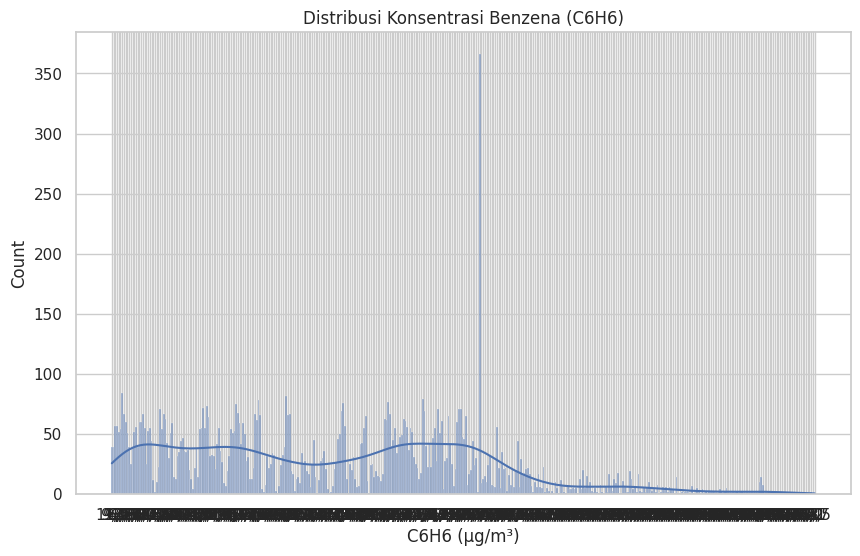

In [5]:
sns.histplot(df["C6H6(GT)"], bins=30, kde=True)
plt.title("Distribusi Konsentrasi Benzena (C6H6)")
plt.xlabel("C6H6 (µg/m³)")
plt.ylabel("Count")
plt.show()

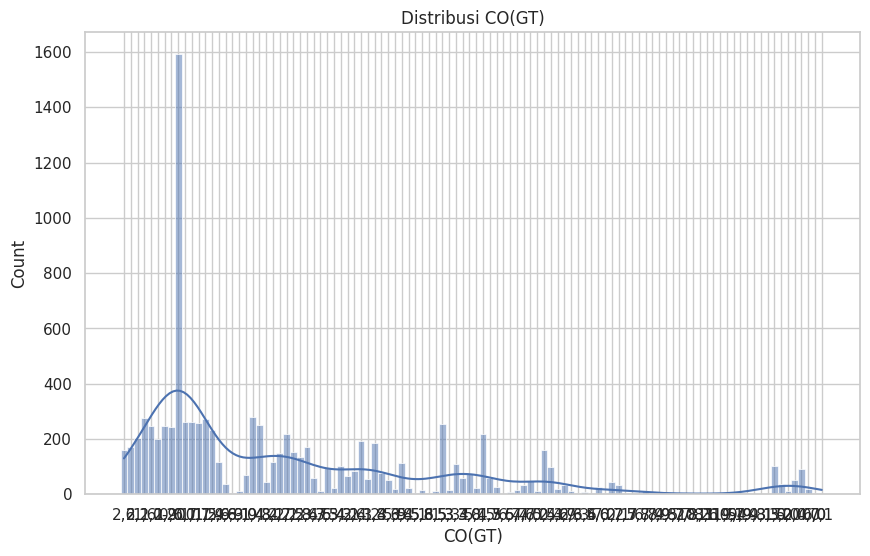

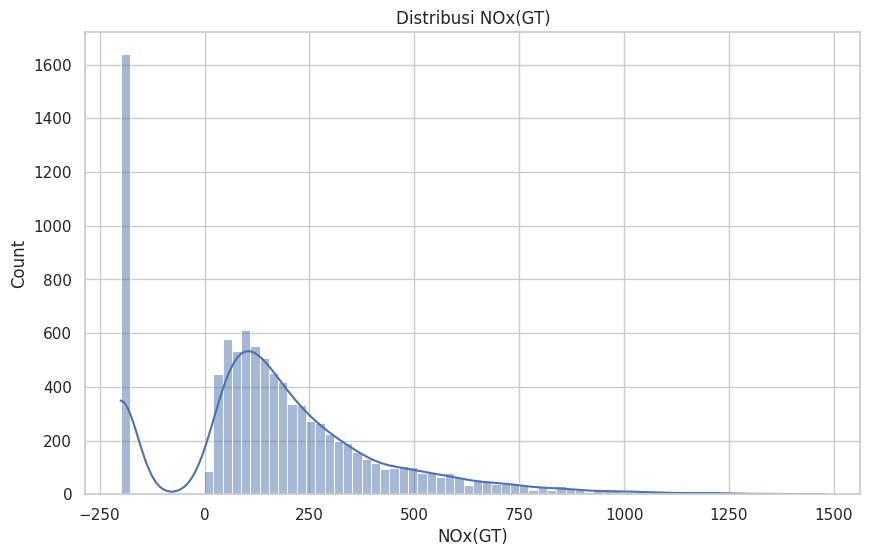

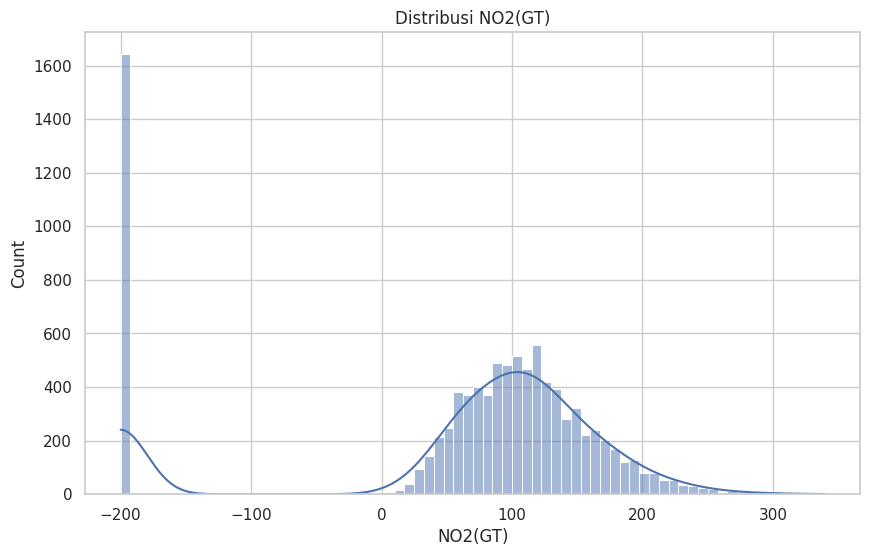

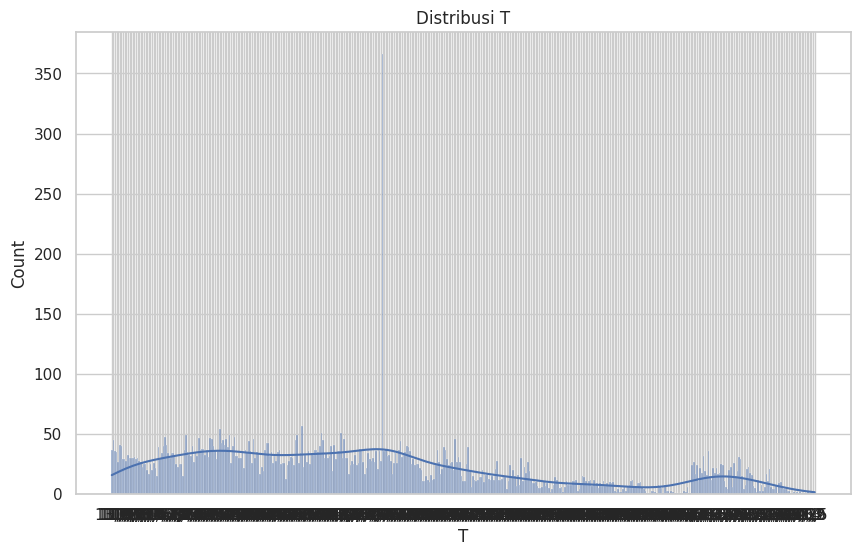

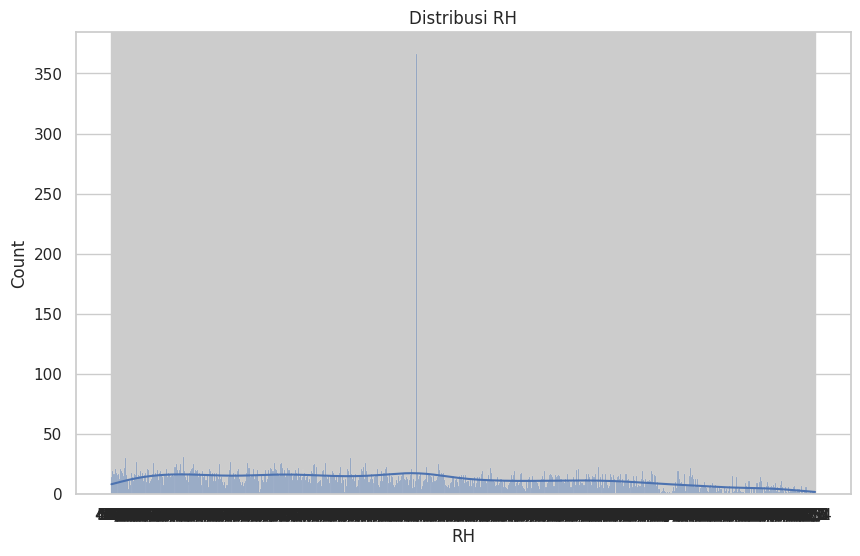

In [6]:
features = ["CO(GT)", "NOx(GT)", "NO2(GT)", "T", "RH"]

for col in features:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribusi {col}")
    plt.show()

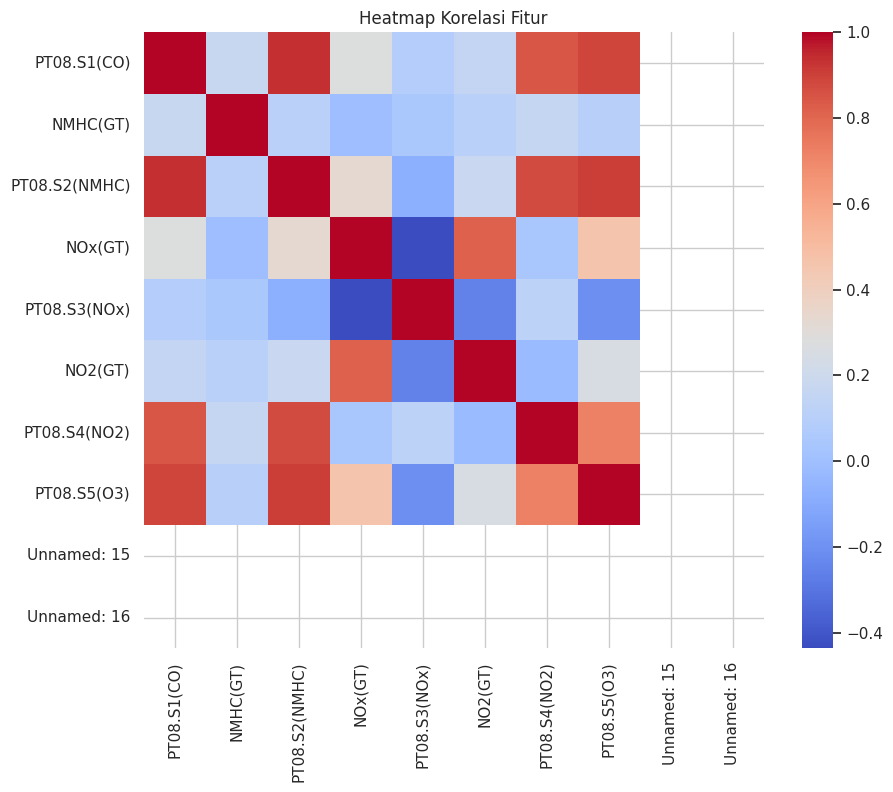

In [7]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Heatmap Korelasi Fitur")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [8]:
print("=== Unique Values Per Column ===")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

=== Unique Values Per Column ===
Date: 391
Time: 24
CO(GT): 104
PT08.S1(CO): 1042
NMHC(GT): 430
C6H6(GT): 408
PT08.S2(NMHC): 1246
NOx(GT): 926
PT08.S3(NOx): 1222
NO2(GT): 284
PT08.S4(NO2): 1604
PT08.S5(O3): 1744
T: 437
RH: 754
AH: 6684
Unnamed: 15: 0
Unnamed: 16: 0


In [9]:
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
df = df.drop(columns=["Date", "Time"], errors="ignore")

for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].str.replace(",", ".", regex=False)
        df[col] = pd.to_numeric(df[col], errors="coerce")

df = df.dropna()
df = df.drop_duplicates()

df.shape

(9326, 13)

In [10]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

In [11]:
target = "C6H6(GT)"
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove(target)

df_clean = remove_outliers_iqr(df, numeric_cols)
df_clean.shape

(5490, 13)

In [12]:
X = df_clean.drop(columns=[target])
y = df_clean[target]

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape

((4392, 12), (1098, 12))

In [15]:
X_scaled_df = pd.DataFrame(
    X_scaled,
    columns=X.columns,
    index=df_clean.index
)

preprocessed_df = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

# Simpan ke file CSV
preprocessed_df.to_csv("preprocessed_data.csv", index=False)

print("Dataset berhasil disimpan sebagai 'preprocessed_data.csv'")

Dataset berhasil disimpan sebagai 'preprocessed_data.csv'
